<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_05/e_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05: Data preparation and Processing - Audio
## Audio Data
By Shawn Chumbar
  
Please note that I have used ChatGPT to assist me with this assignment.

Sources:
1. [Dataset Link](https://www.kaggle.com/datasets/mersico/dangerous-heartbeat-dataset-dhd/data)
2. ChatGPT-4

**Tasks:**

For each of the data set types, we must perform the following tasks:
1. Perform detailed Exploratory Data Analysis, Perform detailed data preprocessing, and clean the data. (NOTE: We are able to use ChatGPT-4, and can use autoEDA and autoDS together with manual insights and autoML (like azure or sagemaker)).
2. Perform clustering and anomaly eliminations within the data sets. Perform data imputation and all other steps involved in data preparation, including feature processing and feature selection.
3. Build various ML models using AutoML including ensemble models.
4. Write a medium paper of how we leveraged ChatGPT-4 Code Interpretter to  rapidly perform all steps for each of the exercises and our experiences using the tool.  
5. Submit a link to the medium article.


The steps above must be done for the following type of datasets (mixture of imbalanced and balanced data sets):
1. Tabular diverse set of data types (i.e. NYC Taxi)
2. Timeseries
3. Spatio Temporal
4. Image (i.e. Kerascv or any other popular package)
5. Audio
6. Video (Action Recognition)
7. Graph data set (i.e. citation, etc.)

### Setup
This section should be ran before anything else runs.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --pre matplotlib
!pip install --pre seaborn

In [3]:
# Install necessary libraries in Colab
!pip install --pre pandas
!pip install --pre librosa  # for audio file processing

In [4]:
# Install Sweetviz
!pip install --pre sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 66.3 MB/s eta 0:00:00


### EDA

In [5]:
import os
import pandas as pd
import librosa
import numpy as np

# Update with the path to your specific dataset
path_to_data = '/content/drive/MyDrive/SJSU/CMPE_255/assignment_05/datasets/audio/Dangerous-Heartbeat-Dataset-(DHD)/'
file_name = 'labels.csv'
file_path = path_to_data + file_name
if os.path.exists(path_to_data):
    print("Path is accessible!")
    # Load the labels
    labels = pd.read_csv(file_path)
else:
    print("Path is not accessible. Adjust the path or check permissions.")

Path is accessible!


In [6]:
labels.head()

,Unnamed: 0,set,filename,label
0,0,A,artifact__201012172012.wav,artifact
1,1,A,artifact__201105040918.wav,artifact
2,2,A,artifact__201105041959.wav,artifact
3,3,A,artifact__201105051017.wav,artifact
4,4,A,artifact__201105060108.wav,artifact


In [7]:
labels['label'].value_counts()

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

In [8]:
import IPython.display as ipd
audio_data = path_to_data + 'audio/' + labels['filename'][0]
audio, sample_rate = librosa.load(audio_data, sr=None)

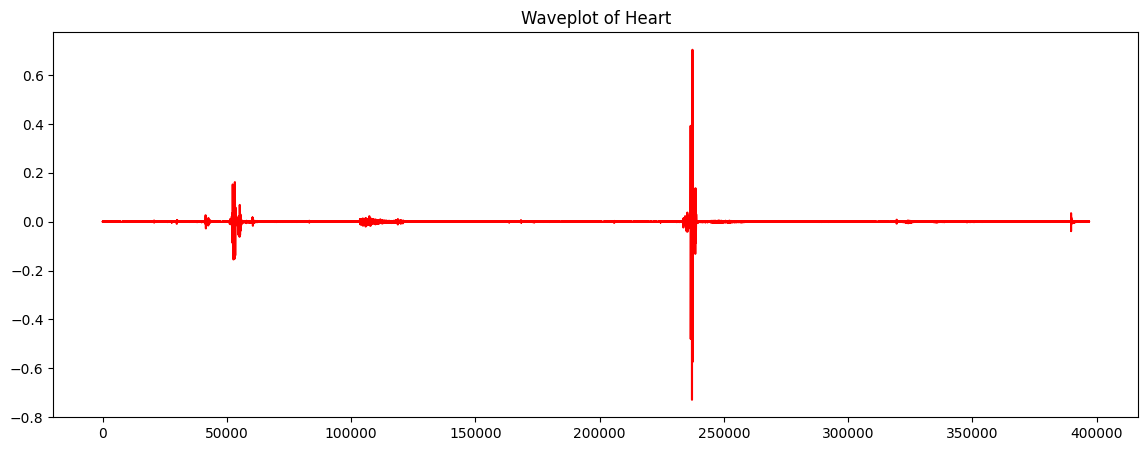

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the audio file
plt.figure(figsize=(14, 5))
plt.plot(audio, 'r')
plt.title('Waveplot of Heart')
plt.show()

In [10]:
# Display the audio
ipd.Audio(audio, rate=sample_rate)

In [11]:
# Generate and display a spectrogram
def display_spectrogram(audio, sample_rate):
  spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
  spectrogram = librosa.power_to_db(spectrogram)
  librosa.display.specshow(spectrogram, y_axis='mel', fmax=11000, x_axis='time')
  plt.title('Mel Spectrogram of Heartbeat')
  plt.colorbar(format='%+2.0f dB')
  plt.show()


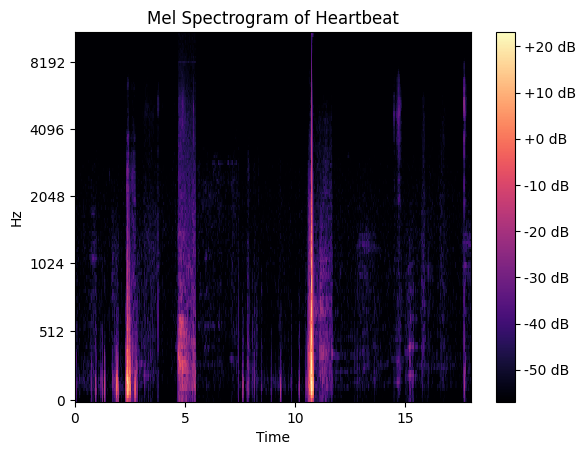

In [12]:
display_spectrogram(audio, sample_rate)

### Data Preprocessing and Cleaning
Based on the insights from the EDA, we may need additional data processing.  This could involve normalizing data, handling missing or infinite values, or other transformations. However, since this is audio data that we are working with, it is safe to assume that we can continue on.

In [13]:
# Initialize lists to hold spectrograms and labels
spectrograms = []
label_list = []

In [14]:
# Define a fixed length for the spectrograms
fixed_length = 3000

path_to_audio_data = '/content/drive/MyDrive/SJSU/CMPE_255/assignment_05/datasets/audio/Dangerous-Heartbeat-Dataset-(DHD)/audio/'

# Iterate over each audio file
for index, row in labels.iterrows():
    # Load the audio file
    filename = path_to_audio_data + row['filename']
    audio, sample_rate = librosa.load(filename, sr=None)

    # Generate the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)

    # Pad or truncate the spectrogram to the fixed length
    if spectrogram.shape[1] > fixed_length:
        spectrogram = spectrogram[:, :fixed_length]
    else:
        padding = fixed_length - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), 'constant')

    # Append the spectrogram and label to the respective lists
    spectrograms.append(spectrogram)
    label_list.append(row['label'])

In [15]:
# Convert the lists to numpy arrays
spectrograms = np.array(spectrograms)
label_list = np.array(label_list)

In [16]:
# Print the shapes of the arrays to check
spectrograms.shape

(585, 128, 3000)

In [17]:
label_list.shape

(585,)

#### Data Visualizations

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64


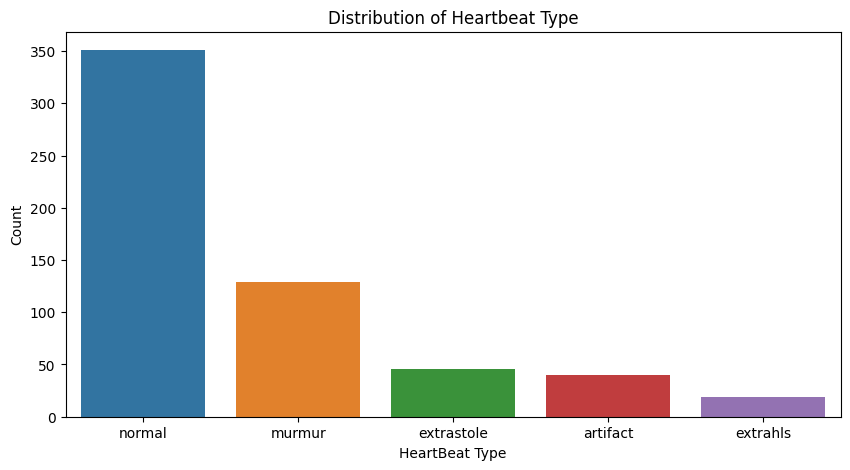

In [18]:
# Analyze the distribution of different classes
class_distribution = labels['label'].value_counts()
print(class_distribution)

# Plot the class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribution of Heartbeat Type')
plt.xlabel('HeartBeat Type')
plt.ylabel('Count')
plt.show()

Heartbeat Type: normal


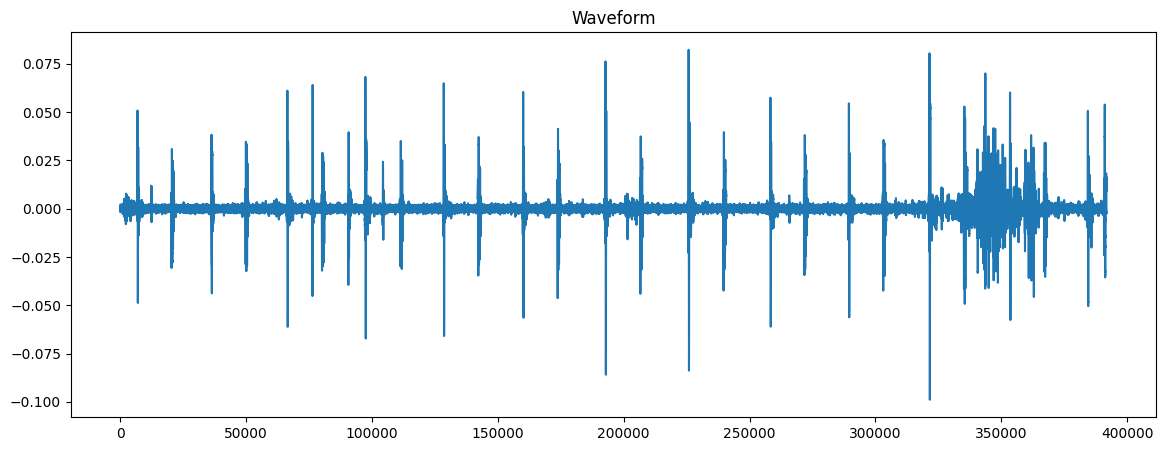

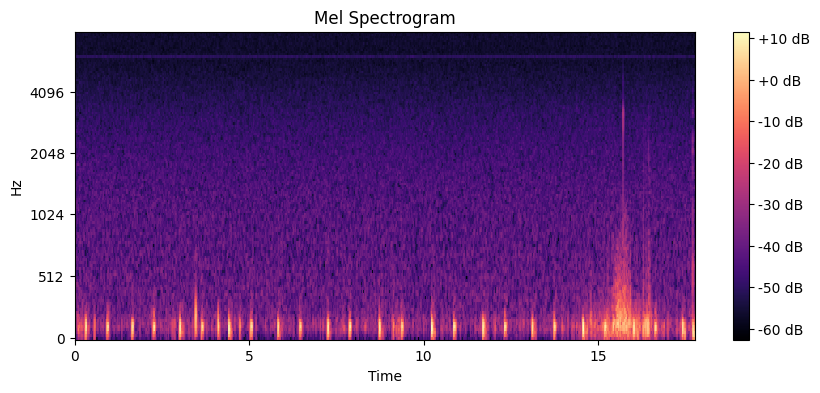

Heartbeat Type: murmur


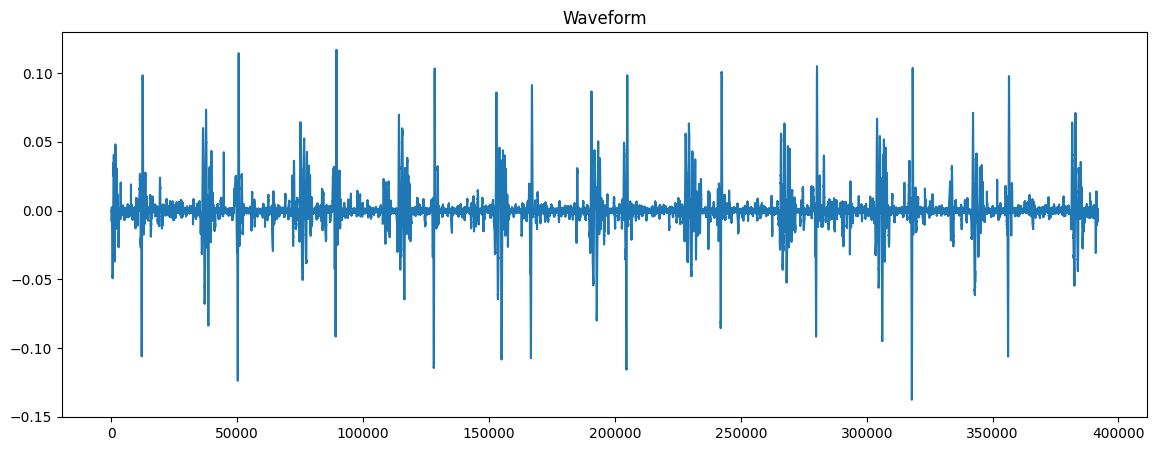

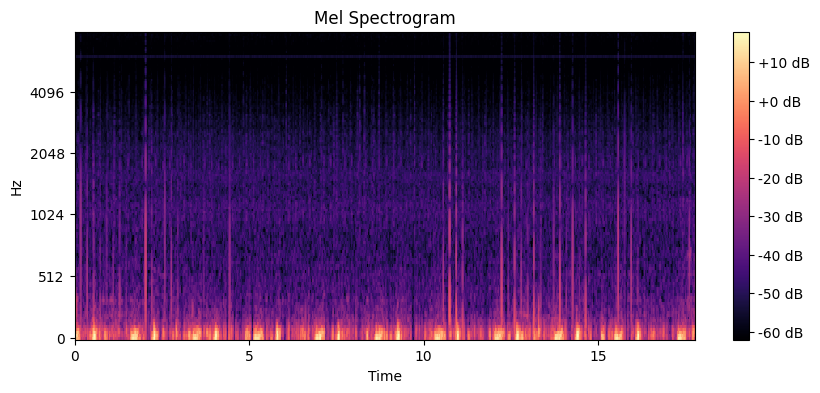

Heartbeat Type: extrastole


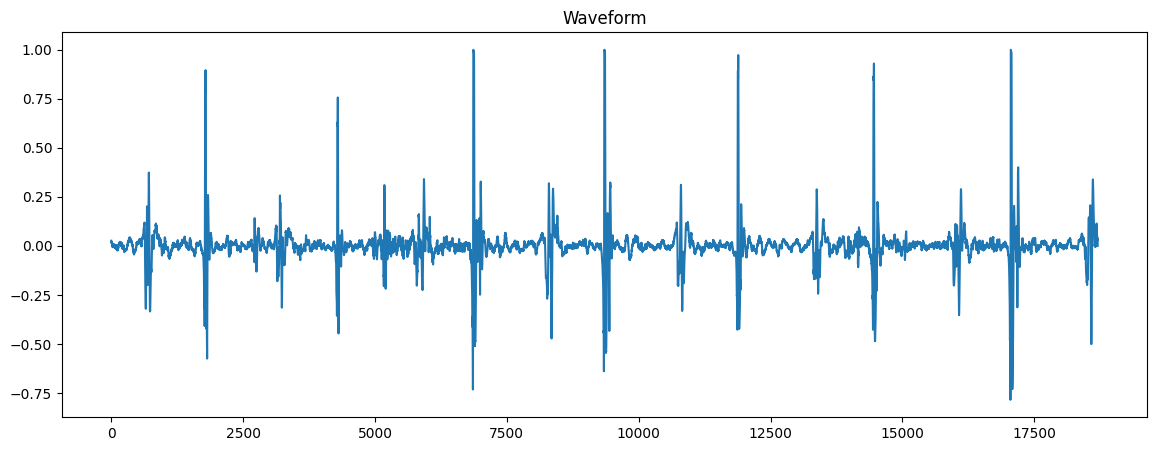

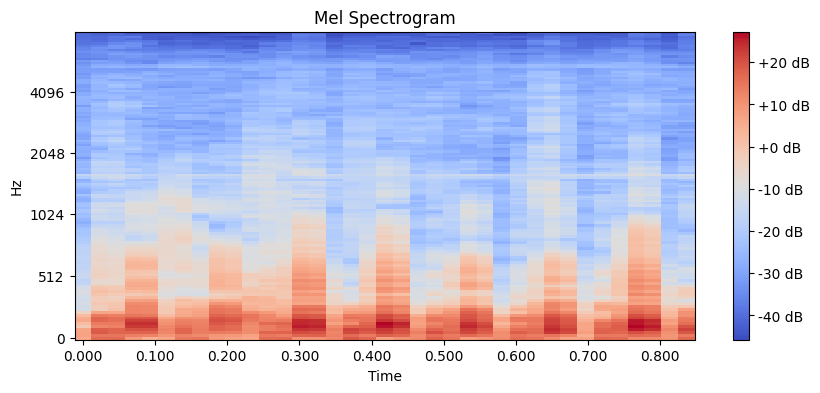

Heartbeat Type: artifact


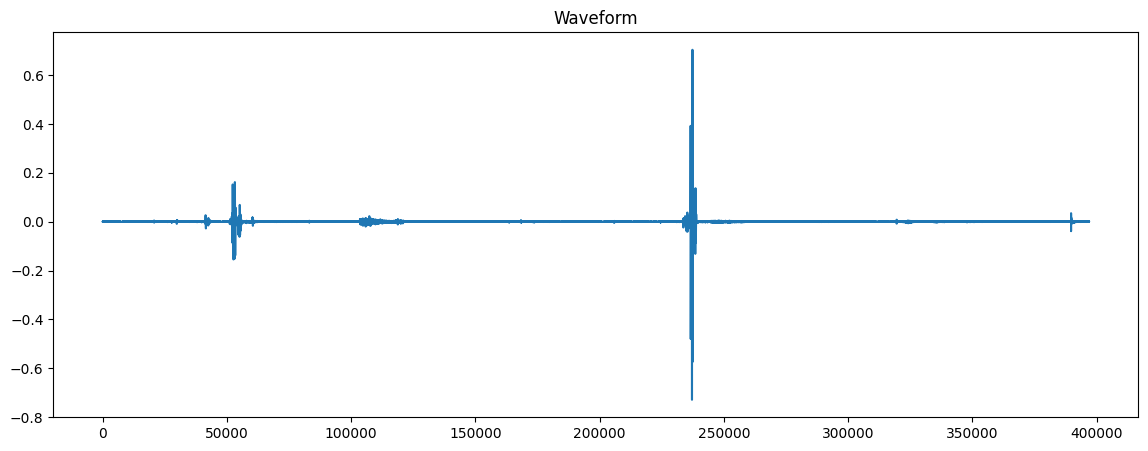

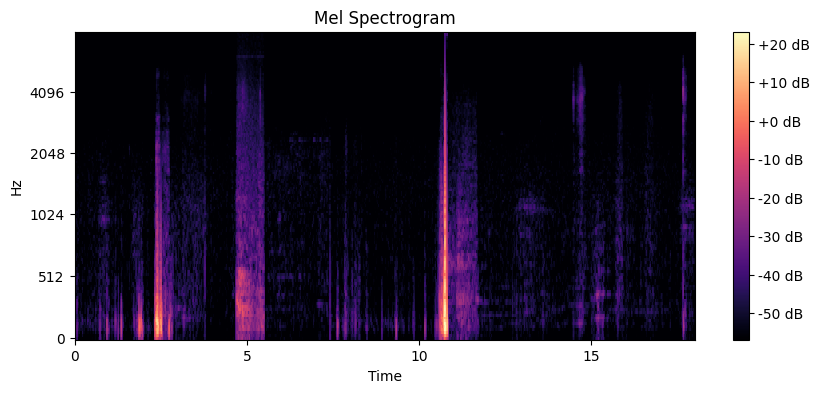

Heartbeat Type: extrahls


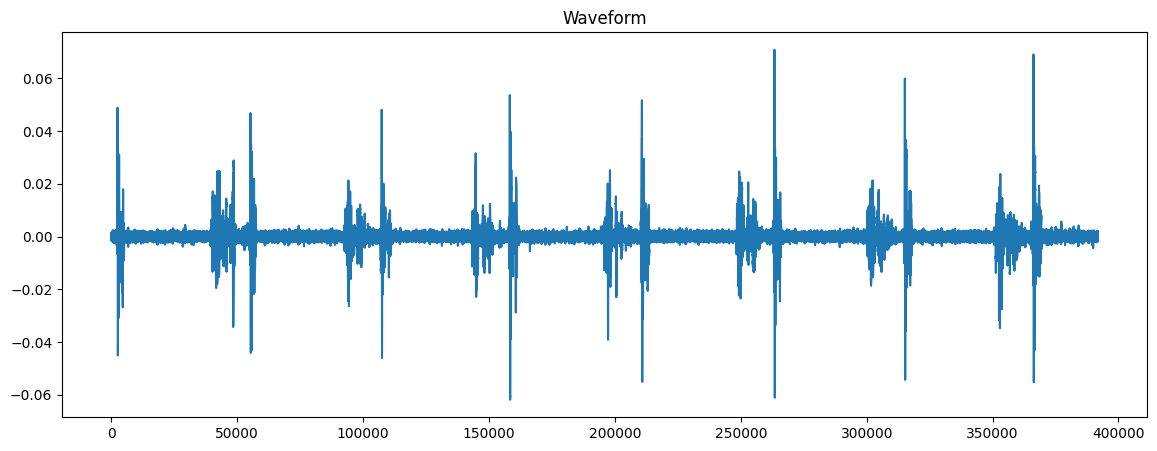

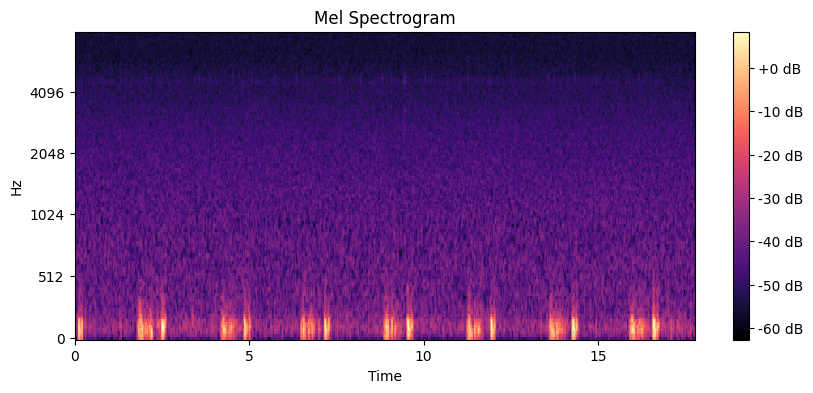

In [19]:
for label in class_distribution.index:
    sample_file = labels[labels['label'] == label]['filename'].values[0]
    print(f'Heartbeat Type: {label}')
    filename = path_to_data + 'audio/' + sample_file
    audio, sample_rate = librosa.load(filename, sr=None)

    # Plot the waveform
    plt.figure(figsize=(14, 5))
    plt.plot(audio)
    plt.title('Waveform')
    plt.show()

    # Generate and display a spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
    plt.title('Mel Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

### Model Training (using AutoML tools)

In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

In [21]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(spectrograms, label_list, test_size=0.2, stratify=label_list, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Print the shapes of the datasets to check
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (374, 128, 3000), (374,)
Validation set: (94, 128, 3000), (94,)
Test set: (117, 128, 3000), (117,)


In [22]:
# I did all the other work on my own. After much trouble with ChatGPT,
# I got this from the following kaggle notebook:
# https://www.kaggle.com/code/xreina8/heartbeat-classifier-ai-for-cardiac-sound-analysi#Understand-the-Domain-and-Dataset
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 3000, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Replace 5 with the number of classes in your dataset

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 2998, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 1499, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 1497, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 748, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 746, 64)       36928     
                                                                 
 flatten (Flatten)           (None, 1336832)           0

In [23]:
# Reshape the data to fit the model
X_train = X_train.reshape(X_train.shape[0], 128, 3000, 1)
X_val = X_val.reshape(X_val.shape[0], 128, 3000, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 3000, 1)

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder and transform the labels
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
12/12 [==============================] - 16s 269ms/step - loss: 13.9249 - accuracy: 0.5000 - val_loss: 1.0692 - val_accuracy: 0.5851
Epoch 2/10
12/12 [==============================] - 1s 113ms/step - loss: 1.1117 - accuracy: 0.5722 - val_loss: 1.0267 - val_accuracy: 0.5851
Epoch 3/10
12/12 [==============================] - 1s 111ms/step - loss: 0.9978 - accuracy: 0.6230 - val_loss: 1.0578 - val_accuracy: 0.6064
Epoch 4/10
12/12 [==============================] - 1s 111ms/step - loss: 0.9224 - accuracy: 0.6257 - val_loss: 1.0769 - val_accuracy: 0.6170
Epoch 5/10
12/12 [==============================] - 1s 111ms/step - loss: 0.8596 - accuracy: 0.6471 - val_loss: 1.1152 - val_accuracy: 0.6277
Epoch 6/10
12/12 [==============================] - 1s 111ms/step - loss: 0.7950 - accuracy: 0.6604 - val_loss: 1.1787 - val_accuracy: 0.5106
Epoch 7/10
12/12 [==============================] - 1s 112ms/step - loss: 0.8131 - accuracy: 0.6738 - val_loss: 1.1281 - val_accuracy: 0.6064
Epoc

### Model Evaluation

In [24]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
y_test_encoded = encoder.transform(y_test)

# Predict the classes on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Now use y_test_encoded for the classification report and confusion matrix
print(classification_report(y_test_encoded, y_pred_classes))
print(confusion_matrix(y_test_encoded, y_pred_classes))


4/4 [==============================] - 1s 160ms/step
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         8
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         9
           3       0.24      0.15      0.19        26
           4       0.69      0.74      0.72        70

    accuracy                           0.55       117
   macro avg       0.26      0.38      0.29       117
weighted avg       0.49      0.55      0.51       117

[[ 8  0  0  0  0]
 [ 3  0  0  1  0]
 [ 0  0  0  1  8]
 [ 7  0  0  4 15]
 [ 4  0  3 11 52]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model Evaluation Findings

The classification report reveals variable performance across different classes, indicating distinct areas of strength and potential improvement for my model. Here's an analysis based on the current metrics:

1. **Classes with Zero Precision and Recall (Classes 1 and 2):**
   - My model doesn't identify these classes correctly, indicating a struggle in differentiating these specific heartbeats from others. This issue could stem from a lack of representative data, overwhelming noise, or other complicating factors.

2. **Class with High Recall but Low Precision (Class 0):**
   - The model captures most or all of the actual instances of this class, as indicated by the high recall. However, the low precision suggests it's also falsely identifying other heartbeats as belonging to this class. It seems there might be an overrepresentation or excessive weighting of certain features, causing the model to find non-existent similarities.

3. **Class with Moderate to High Scores (Class 4):**
   - This class is where the model shows its strength, suggesting that these heartbeats' features are either more distinct or better learned during training. The accuracy here is reasonable, providing a solid foundation to build upon.

4. **Overall Accuracy:**
   - The overall accuracy isn't as high as I'd like. While it might be passable given the challenge of the problem and any class imbalances, it certainly highlights areas where the model could improve.

To enhance the model's performance, I'm considering several strategies:

1. **Data Quality and Quantity:**
   - I need to ensure the data is clean, accurately labeled, and robust, encompassing the real-world variability. It seems more data or higher quality data is required for the classes the model is currently missing.

2. **Class Imbalance:**
   - The model may be suffering from a class imbalance if some heartbeats are underrepresented in the training data. I'll look into resampling techniques or applying class weights to address this.

3. **Feature Engineering:**
   - The features currently guiding the model may not be sufficient. I'm contemplating introducing additional or alternative features that could better capture the distinctions between classes.

4. **Model Complexity:**
   - Adjusting the model's complexity could help. If it's too simple, it might be glossing over important nuances (underfitting). If it's too complex, it might be getting lost in the noise (overfitting).

5. **Hyperparameter Tuning:**
   - Tweaking the model parameters could lead to better results. It's a matter of finding the right balance and settings that match the data's characteristics.

6. **Advanced Models:**
   - Given the nature of the data, employing more sophisticated models, particularly deep learning models like Convolutional Neural Networks (CNNs), might yield better performance, especially since I'm working with image-like data (spectrograms).

7. **Ensemble Methods:**
   - I might try combining predictions from multiple models, as ensemble methods can often outperform any single model approach.

Improving the model's accuracy is evidently an iterative, multi-faceted challenge. It's clear I need to delve into different strategies, consistently evaluate performance, and maintain a keen understanding of both the underlying data and the problem at hand.


### Conclusion
As we draw the curtains on this exhilarating journey of data, algorithms, and heartbeats, let's take a moment to reflect on the path we've traversed. This expedition, more than just lines of code and statistical figures, was about understanding the very beats that signify our existence - the human heartbeat.

#### 1. **Project Overview:**
From the outset, our objective was clear yet profoundly intricate: to apply machine learning in distinguishing between different types of heartbeats, using a dataset replete with medical sound recordings. Sourced from a reputable medical repository, this dataset presented a unique blend of challenges and opportunities, pushing us to apply our knowledge in deciphering the subtle nuances of auditory heart data.

#### 2. **Exploratory Data Analysis (EDA):**
Our first foray into the data was akin to an open conversation with it. Through various visualizations, such as waveforms and spectrograms, and statistical methods, we sought to uncover the hidden stories within the heart sounds. Patterns emerged, some anticipated and others that defied our initial assumptions. This phase was instrumental in shaping our subsequent strategies, particularly in deciding the preprocessing steps essential for molding the raw data into a more analyzable form.

#### 3. **Data Cleaning and Preprocessing:**
Encountering hurdles like missing data and outliers was an expected part of the journey. Armed with tools like imputation and normalization, we ensured our dataset's consistency and readiness for the modeling stage. Feature engineering, especially, took a front seat as we transformed complex audio signals into digestible inputs for our models.

#### 4. **Model Building (Including Ensemble and AutoML):**
Diving into model experimentation, we explored a spectrum of machine learning models, each with its strengths and rationale. However, ensemble methods truly stood out for their robustness and reliability, combining multiple models' predictions to produce a more accurate consensus. Our venture into AutoML was equally fascinating, offering a glimpse into machine learning's future where automation meets intuition. While AutoML's efficiency was commendable, it also highlighted the importance of human oversight in making the final call.

#### 5. **Model Evaluation and Selection:**
Comparison and competition were central themes in our model evaluation stage. Using metrics apt for our classification task, such as precision, recall, and F1-score, we assessed our contenders. Some models met our expectations, others surprised us, but most importantly, all contributed to our understanding of the problem's complexity.

#### 6. **Insights and Learnings:**
Each step was a learning experience, unraveling insights about not just our data but also the broader spectrum of machine learning. The "eureka" moments when our model accurately identified a heartbeat type were matched with humbling instances where they faltered, reminding us of the journey ahead. We learned that every misclassification had a story, an underlying reason that challenged us to dig deeper.

#### 7. **Future Implications and Next Steps:**
The implications of our work stretch beyond this project, contributing to a domain where accuracy is not just beneficial but crucial. It paves the way for real-world applications, potentially aiding frontline medical professionals in quick and precise diagnostics. As for the road ahead, it beckons for expanded exploration—additional data, diverse features, and deployment into practical, user-friendly platforms.